In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
mon_dict={1:'January',2:'February',3:'March', 4:'April', 5:'May', 6:'June',7:'July', 8:'August', 9:'September',
         10:'October', 11:'November', 12:'December'}
season_dict={3:1,4:1,5:1,6:2,7:2,8:2,9:3,10:3,11:3,12:4,1:4,2:4} #1: spring, 2: summer, 3: autumn, 4: winter

### Developing the history for each AMR

In [8]:
stations_amr=pd.read_csv('Stations_AMR.csv')
stations_amr.columns

Index(['Stations_id', 'von_datum', 'bis_datum', 'geoCoords', 'AMR_Key',
       'Stationsname', 'AMR_Kreis'],
      dtype='object')

In [16]:
min(stations_amr['von_datum'])

19500101

In [14]:
pd.merge(stations_amr[['AMR_Key','von_datum']].groupby(by='AMR_Key').min().reset_index(),
stations_amr[['AMR_Key','bis_datum']].groupby(by='AMR_Key').max().reset_index(),how='inner',on='AMR_Key')


,AMR_Key,von_datum,bis_datum
0,2000,19500101,20221030
1,3101,19610101,20221030
2,3159,19520101,20221030
3,3241,19530301,20221030
4,3403,19500101,20221030
5,3404,19520201,20221030
6,4011,19520101,20221030
7,5113,19500101,20221030
8,5315,19570701,20221030
9,5334,19690101,20221030


## DAILY TEMPERATURE DATA 

In [2]:
weatherog=pd.read_csv("temperaturedfv1.csv")
weatherog.shape

(1794578, 7)

In [3]:
weatherog.columns

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_3', 'AMR_key', 'TMK', 'TXK', 'TNK'], dtype='object')

In [4]:
#the og data has the station level data, to convert this to AMR level data, first take average of temperature 
#over all stations in every AMR.
amr_panel_temp=weatherog.groupby(by=["AMR_key","MESS_DATUM"]).mean().drop(["STATIONS_ID","QN_3"],axis=1)
amr_panel_temp_dims=amr_panel_temp.groupby(by="AMR_key").count() #gives number of observations in every AMR
print(amr_panel_temp.shape)
amr_panel_temp.reset_index(inplace=True)

(513315, 3)


In [5]:
print("There are ",amr_panel_temp_dims.shape[0]," Labour Market Regions in the Temperature Data" )

There are  47  Labour Market Regions in the Temperature Data


            amr_panel contains daily temperature data for every AMR (expected) from 01 Jan 1991 to 31 Dec 2021.
            Additional columns are incorporated that have indicators for month and for the day of the year, this
            is useful because temperature is non-stationary from its cyclical time trend.
            Also daily temperature is generally highly persistence, so having monthly indicators can bring the 
            analysis to monthly level. Also, can later be modified to add seasonal indicators.

In [6]:
amr_panel_temp["year"]=(amr_panel_temp["MESS_DATUM"]/10000).astype(int)
amr_panel_temp["month"]=((amr_panel_temp["MESS_DATUM"]%10000)/100).astype(int)
amr_panel_temp["day_of_year"]=amr_panel_temp.groupby(by=["AMR_key","year"]).cumcount()+1
print("The Years in the Data: ",set(amr_panel_temp["year"]))
print("The Month in the Data: ",set(amr_panel_temp["month"]))
print("The columns in the Data: ",list(amr_panel_temp.columns))

The Years in the Data:  {1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}
The Month in the Data:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
The columns in the Data:  ['AMR_key', 'MESS_DATUM', 'TMK', 'TXK', 'TNK', 'year', 'month', 'day_of_year']


                             PLOTTING THE MEAN TEMPERATURE IN EVERY MONTH YEAR FROM 1991 TO 2021
                                         (normalised by year mean and standard dev) 


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


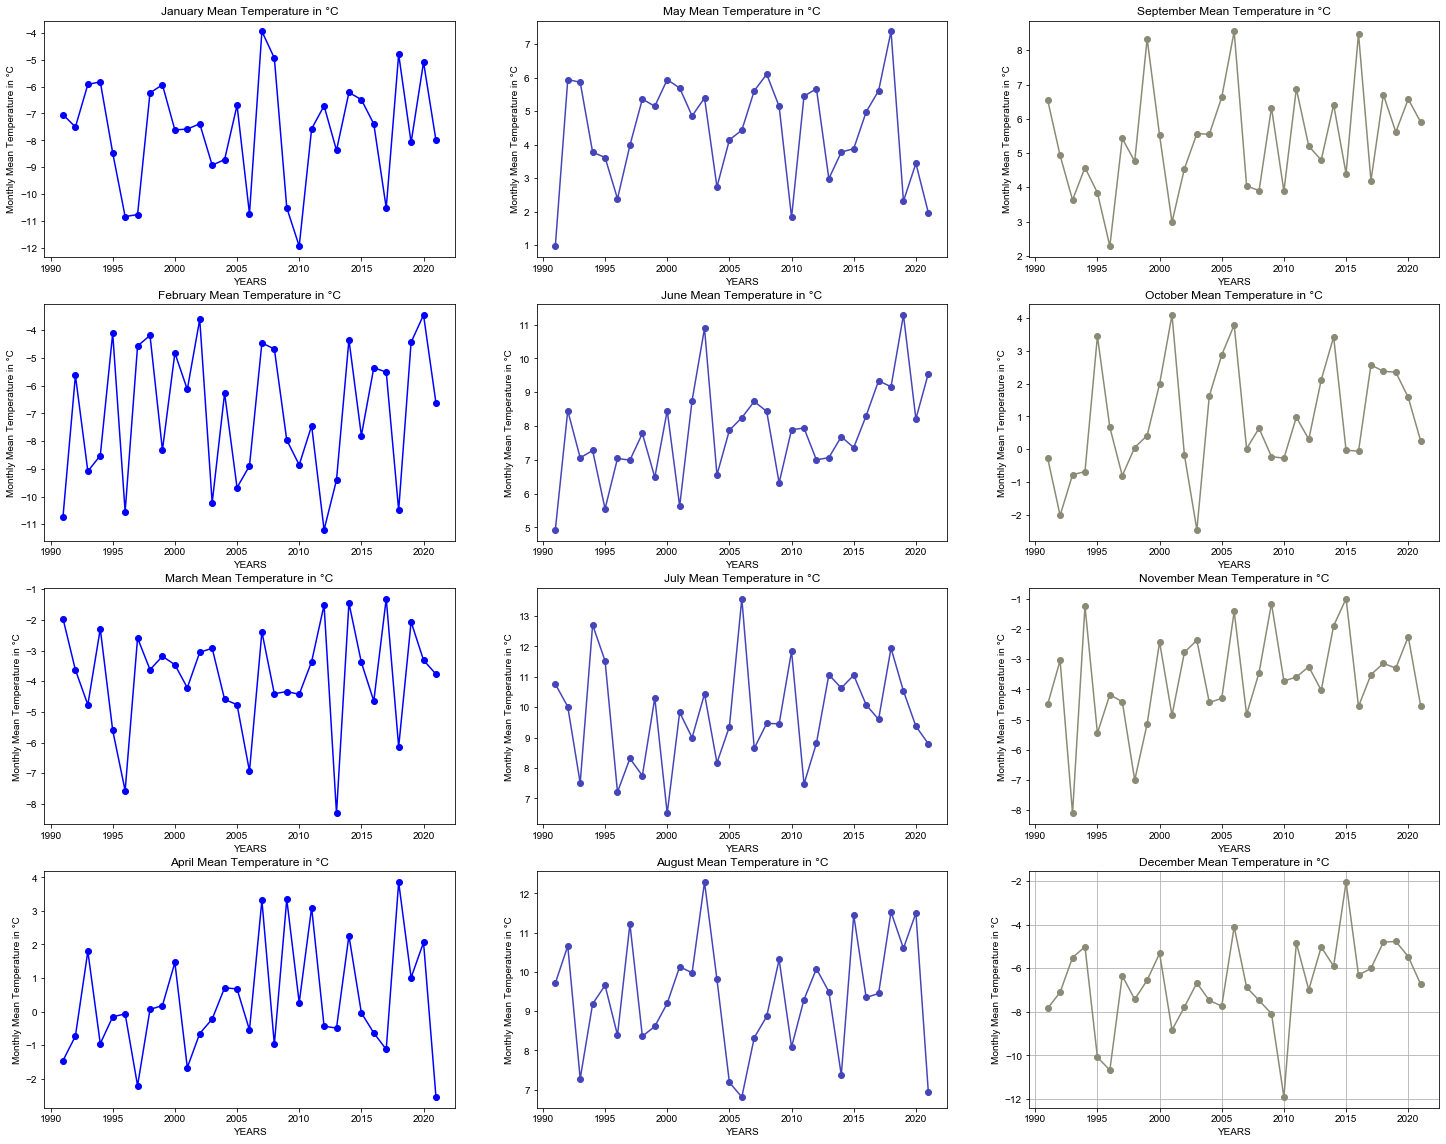

In [7]:
print("                             PLOTTING THE MEAN TEMPERATURE IN EVERY MONTH YEAR FROM 1991 TO 2021")
print("                                         (normalised by year mean and standard dev) ")
df=amr_panel_temp.groupby(by=["year","month"]).mean().reset_index()
df['year_mean']=amr_panel_temp.groupby(by='year').transform('mean')['TMK']
df['year_std']=amr_panel_temp.groupby(by='year').transform('std')['TMK']
years=[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
cmap=sns.blend_palette(colors=["blue","yellow","red","cyan"],n_colors=12)
fig,ax=plt.subplots(4,3,figsize=(25,20))
plt.grid(True)
sns.set_theme(style="darkgrid")
mon=1
for i in range(3):
    for j in range(4):
        tdf=pd.DataFrame(df[df["month"]==mon][["TMK","year_mean"]])
        tdf['demeaned']=tdf['TMK']-tdf['year_mean']
        ax[j][i].plot(years,tdf['demeaned'],marker="o",color=cmap[i])
        ax[j][i].set_xlabel("YEARS")
        ax[j][i].set_ylabel("Monthly Mean Temperature in °C")
        ax[j][i].set_title(mon_dict[mon]+" Mean Temperature in °C")
        mon=mon+1
plt.show()

## DAILY PRECIPITATION DATA

In [9]:
weatherog=pd.read_csv("precdfv1.csv")
weatherog.shape

(1930156, 6)

In [10]:
weatherog.columns

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_3', 'AMR_key', 'RSK', 'RSKF'], dtype='object')

In [11]:
#the og data has the station level data, to convert this to AMR level data, first take average of precipitation 
#over all stations in every AMR.
amr_panel_prec=weatherog.groupby(by=["AMR_key","MESS_DATUM"]).mean().drop(["STATIONS_ID","QN_3"],axis=1)
amr_panel_prec_dims=amr_panel_prec.groupby(by="AMR_key").count() #gives number of observations in every AMR
print(amr_panel_prec.shape)
amr_panel_prec.reset_index(inplace=True)

(519075, 2)


In [12]:
print("There are ",amr_panel_prec_dims.shape[0]," Labour Market Regions in the Precipitation Data" )

There are  47  Labour Market Regions in the Precipitation Data


In [13]:
amr_panel_prec["year"]=(amr_panel_prec["MESS_DATUM"]/10000).astype(int)
amr_panel_prec["month"]=((amr_panel_prec["MESS_DATUM"]%10000)/100).astype(int)
amr_panel_prec["day_of_year"]=amr_panel_prec.groupby(by=["AMR_key","year"]).cumcount()+1
print("The Years in the Data: ",set(amr_panel_prec["year"]))
print("The Month in the Data: ",set(amr_panel_prec["month"]))
print("The columns in the Data: ",list(amr_panel_prec.columns))

The Years in the Data:  {1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}
The Month in the Data:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
The columns in the Data:  ['AMR_key', 'MESS_DATUM', 'RSK', 'RSKF', 'year', 'month', 'day_of_year']


                             PLOTTING THE MEAN ANNUAL PRECIPITATION FROM 1991 TO 2021
                                                          (demeaned) 


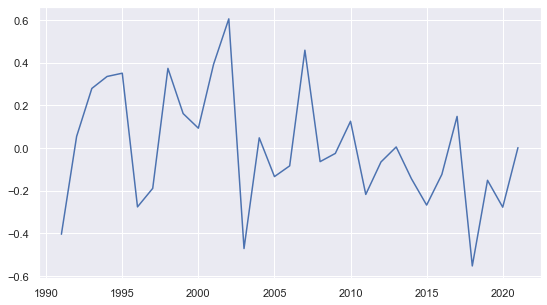

In [17]:
print("                             PLOTTING THE MEAN ANNUAL PRECIPITATION FROM 1991 TO 2021")
print("                                                          (demeaned) ")
df=amr_panel_temp.groupby(by=["year","month"]).mean().reset_index()
df['year_mean']=amr_panel_prec.groupby(by='year').transform('mean')['RSK']
df=amr_panel_prec.groupby(by=["year"]).mean().reset_index()
df['demeaned']=df['RSK']-np.mean(df['RSK'])
years=[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
fig,ax=plt.subplots(figsize=(9,5))
ax.plot(years,df['demeaned'])
plt.show()

                             PLOTTING THE MEAN PRECIPITATION IN EVERY MONTH YEAR FROM 1991 TO 2021
                                                          (demeaned) 


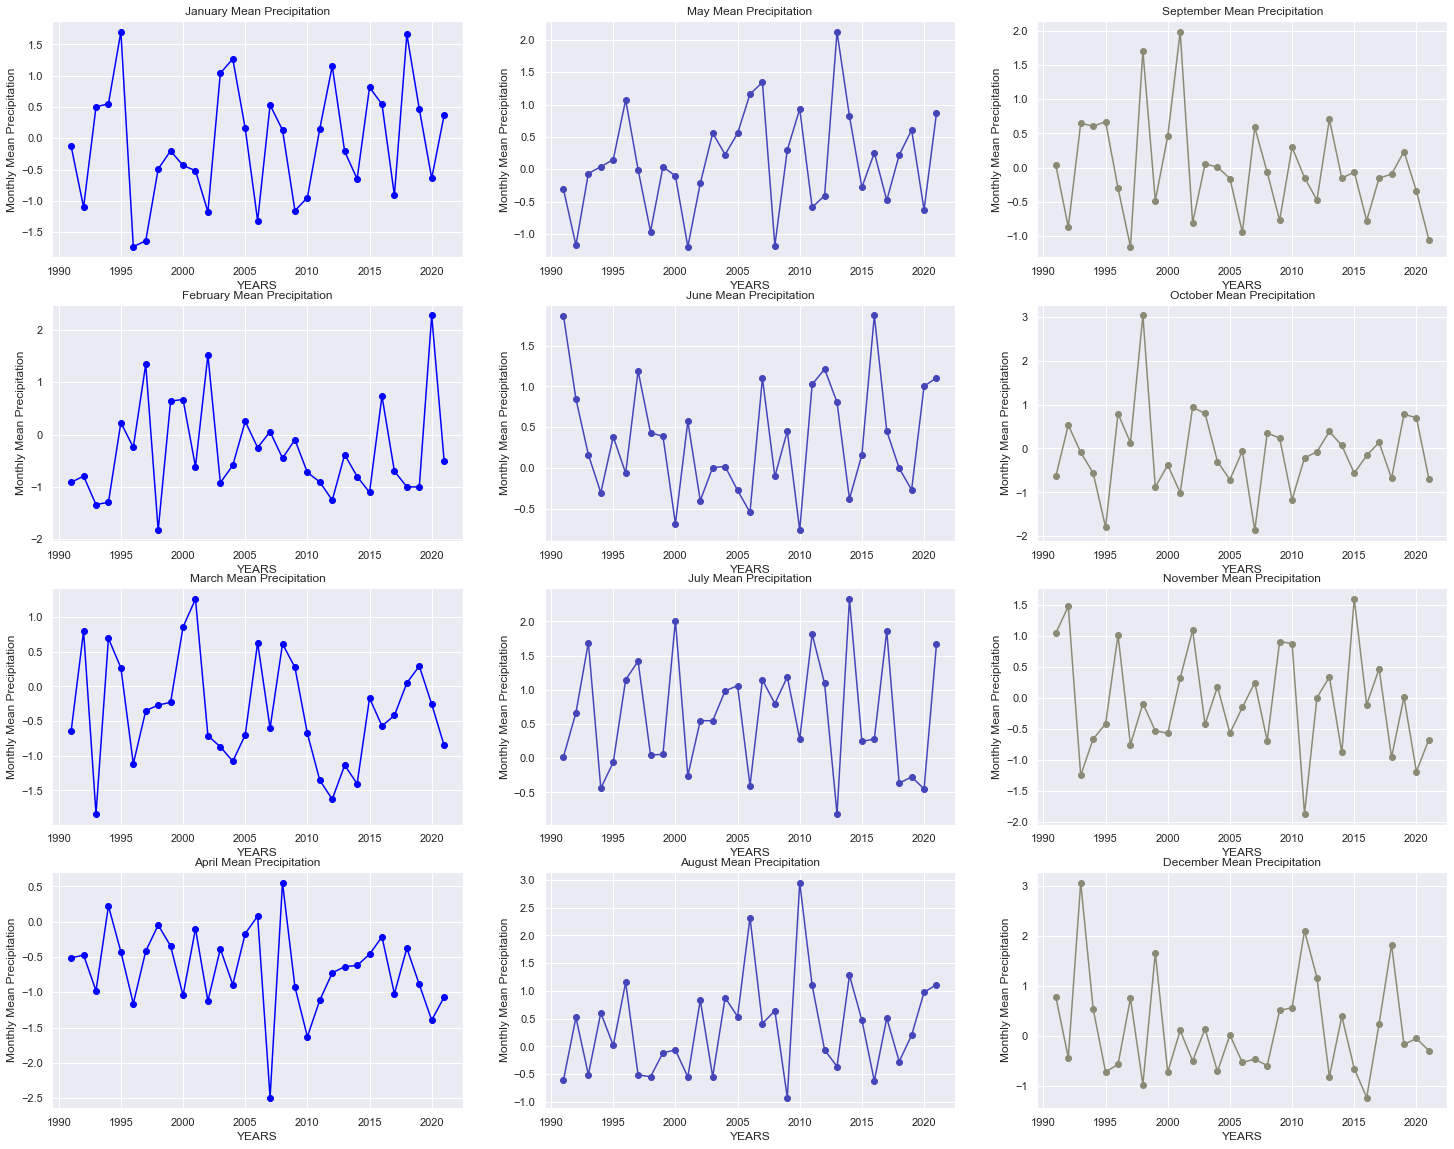

In [18]:
print("                             PLOTTING THE MEAN PRECIPITATION IN EVERY MONTH YEAR FROM 1991 TO 2021")
print("                                                          (demeaned) ")
df=amr_panel_prec.groupby(by=["year","month"]).mean().reset_index()
df['year_mean']=df.groupby(by='year').transform('mean')['RSK']
years=[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
cmap=sns.blend_palette(colors=["blue","yellow","red","cyan"],n_colors=12)
fig,ax=plt.subplots(4,3,figsize=(25,20))
sns.set_theme(style="darkgrid")
mon=1
for i in range(3):
    for j in range(4):
        tdf=pd.DataFrame(df[df["month"]==mon][["RSK","year_mean"]])
        tdf['demeaned']=tdf['RSK']-tdf['year_mean']
        ax[j][i].plot(years,tdf['demeaned'],marker="o",color=cmap[i])
        ax[j][i].set_xlabel("YEARS")
        ax[j][i].set_ylabel("Monthly Mean Precipitation")
        ax[j][i].set_title(mon_dict[mon]+" Mean Precipitation")
        mon=mon+1
plt.grid(True)
plt.show()

## DAILY WIND DATA

In [19]:
weatherog=pd.read_csv("winddfv1.csv")
weatherog.shape

(2311972, 6)

In [20]:
weatherog.columns

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_3', 'AMR_key', 'FX', 'FM'], dtype='object')

In [21]:
#the og data has the station level data, to convert this to AMR level data, first take average of temperature 
#over all stations in every AMR.
amr_panel_wind=weatherog.groupby(by=["AMR_key","MESS_DATUM"]).mean().drop(["STATIONS_ID","QN_3"],axis=1)
amr_panel_wind_dims=amr_panel_wind.groupby(by="AMR_key").count() #gives number of observations in every AMR
print(amr_panel_wind.shape)
amr_panel_wind.reset_index(inplace=True)

(523896, 2)


In [22]:
print("There are ",amr_panel_wind_dims.shape[0]," Labour Market Regions in the Wind Data" )

There are  47  Labour Market Regions in the Wind Data


In [23]:
amr_panel_wind["year"]=(amr_panel_wind["MESS_DATUM"]/10000).astype(int)
amr_panel_wind["month"]=((amr_panel_wind["MESS_DATUM"]%10000)/100).astype(int)
amr_panel_wind["day_of_year"]=amr_panel_wind.groupby(by=["AMR_key","year"]).cumcount()+1
print("The Years in the Data: ",set(amr_panel_wind["year"]))
print("The Month in the Data: ",set(amr_panel_wind["month"]))
print("The columns in the Data: ",list(amr_panel_wind.columns))

The Years in the Data:  {1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}
The Month in the Data:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
The columns in the Data:  ['AMR_key', 'MESS_DATUM', 'FX', 'FM', 'year', 'month', 'day_of_year']


                             PLOTTING THE MEAN ANNUAL WIND SPEED FROM 1990 TO 2021
                                                          (demeaned) 


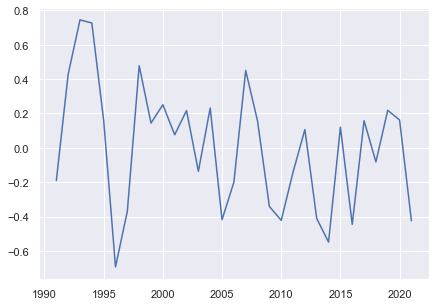

In [24]:
print("                             PLOTTING THE MEAN ANNUAL WIND SPEED FROM 1990 TO 2021")
print("                                                          (demeaned) ")
df=amr_panel_wind.groupby(by=["year"]).mean().reset_index()
df['demeaned']=df['FX']-np.mean(df['FX'])
years=[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
fig,ax=plt.subplots(figsize=(7,5))
ax.plot(years,df['demeaned'])
plt.show()

                             PLOTTING THE MAXIMUM WIND SPEED IN EVERY MONTH YEAR FROM 1991 TO 2021
                                                          (demeaned) 


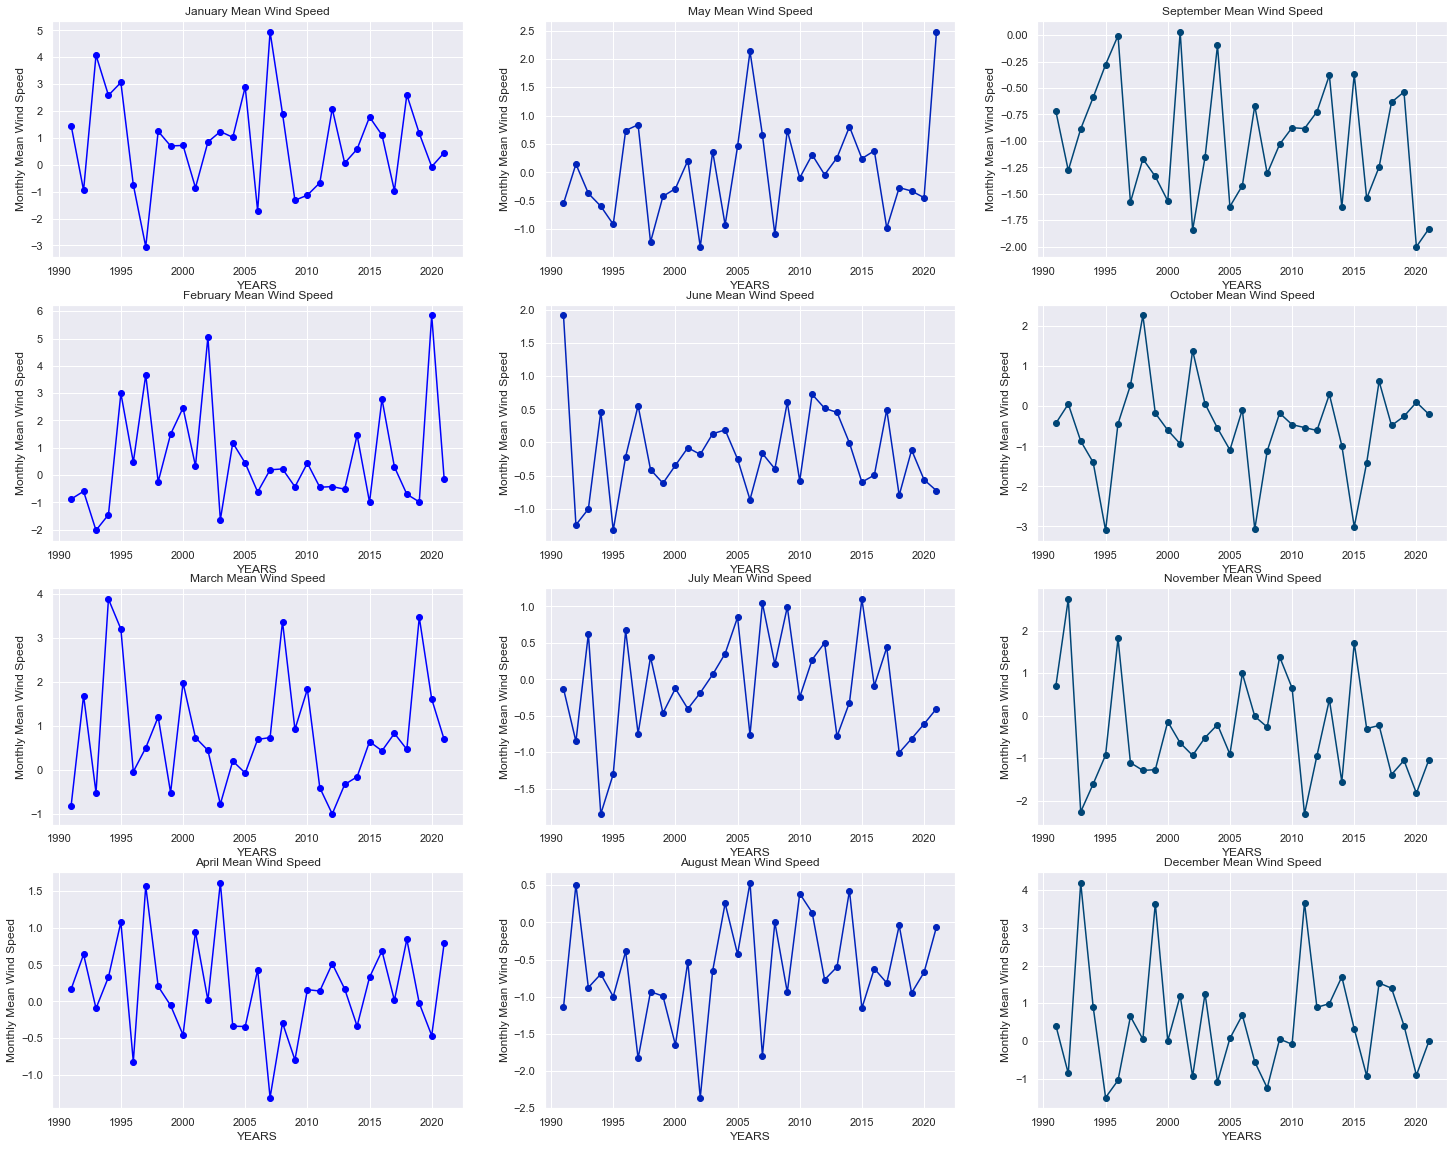

In [25]:
print("                             PLOTTING THE MAXIMUM WIND SPEED IN EVERY MONTH YEAR FROM 1991 TO 2021")
print("                                                          (demeaned) ")
df=amr_panel_wind.groupby(by=["year","month"]).mean().reset_index()
df['year_mean']=df.groupby(by='year').transform('mean')['FX']
years=[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
cmap=sns.blend_palette(colors=["blue",'green','orange',"red"],n_colors=12)
fig,ax=plt.subplots(4,3,figsize=(25,20))
sns.set_theme(style="darkgrid")
mon=1
mon_dict={1:'January',2:'February',3:'March', 4:'April', 5:'May', 6:'June',7:'July', 8:'August', 9:'September',
         10:'October', 11:'November', 12:'December'}
for i in range(3):
    for j in range(4):
        tdf=pd.DataFrame(df[df["month"]==mon][["FX","year_mean"]])
        tdf['demeaned']=tdf['FX']-tdf['year_mean']
        ax[j][i].plot(years,tdf['demeaned'],marker="o",color=cmap[i])
        ax[j][i].set_xlabel("YEARS")
        ax[j][i].set_ylabel("Monthly Mean Wind Speed")
        ax[j][i].set_title(mon_dict[mon]+" Mean Wind Speed")
        mon=mon+1
plt.grid(True)
plt.show()

#### Identifying Extreme Climate Events: 

A simple method is to establish a specific threshold for temperature and extreme precipitation events and evaluate the extremes that occur over (or under) that given threshold. Another common mean of ascertaining thresholds is based on selecting the tail of distributions for temperature and precipitation.Statistical partitions such as by quartiles or percentiles of the distribution have provided a means for evaluating extremes

In [17]:
weatherog=pd.read_csv("tempdfv1900.csv").drop("Unnamed: 0",axis=1)
weatherog["year"]=(weatherog["MESS_DATUM"]/10000).astype(int)
weatherog["month"]=((weatherog["MESS_DATUM"]%10000)/100).astype(int)
weatherog["mm-dd"]=(weatherog["MESS_DATUM"]%10000).astype(int)
weatherog['season']=weatherog['month'].apply(lambda x: season_dict[x])
print(weatherog.shape)
weatherog.head()

(3185718, 11)


,STATIONS_ID,MESS_DATUM,QN_3,Stationsname,AMR_key,TMK,TXK,TNK,year,month,season
0,52,19730101,5.0,Ahrensburg-Wulfsdorf,2000,-7.5,-2.2,-10.3,1973,1,4
1,52,19730102,5.0,Ahrensburg-Wulfsdorf,2000,-4.4,-0.3,-12.4,1973,1,4
2,52,19730103,5.0,Ahrensburg-Wulfsdorf,2000,1.4,3.0,-3.4,1973,1,4
3,52,19730104,5.0,Ahrensburg-Wulfsdorf,2000,-1.0,1.4,-1.7,1973,1,4
4,52,19730105,5.0,Ahrensburg-Wulfsdorf,2000,2.6,3.5,-1.7,1973,1,4


,STATIONS_ID,MESS_DATUM,QN_3,Stationsname,AMR_key,TMK,TXK,TNK,year,month,season,mm-dd
0,52,19730101,5.0,Ahrensburg-Wulfsdorf,2000,-7.5,-2.2,-10.3,1973,1,4,101
1,52,19730102,5.0,Ahrensburg-Wulfsdorf,2000,-4.4,-0.3,-12.4,1973,1,4,102
2,52,19730103,5.0,Ahrensburg-Wulfsdorf,2000,1.4,3.0,-3.4,1973,1,4,103
3,52,19730104,5.0,Ahrensburg-Wulfsdorf,2000,-1.0,1.4,-1.7,1973,1,4,104
4,52,19730105,5.0,Ahrensburg-Wulfsdorf,2000,2.6,3.5,-1.7,1973,1,4,105


In [49]:
max(weatherog["mm-dd"])

1231

In [59]:
amr_5515=weatherog[weatherog['AMR_key']==5515] 
print(amr_5515.shape)
amr_5515=amr_5515[['MESS_DATUM','AMR_key', 'TMK', 'TXK', 'TNK', 'year', 'month',
       'season','mm-dd']].groupby(by='MESS_DATUM').mean().reset_index() ### taking daily average of all weather stations in the AMR
print(amr_5515.shape)
amr_5515.dropna(inplace=True)

(33667, 12)
(18962, 9)


In [64]:
#amr_5515['TMK_perday']=amr_5515.groupby('mm-dd').transform('mean')['TMK']
amr_5515['TNK_perday']=amr_5515.groupby('mm-dd').transform('mean')['TNK']
amr_5515['TXK_perday']=amr_5515.groupby('mm-dd').transform('mean')['TXK']

In [65]:
amr_5515[amr_5515['mm-dd']==201]

,MESS_DATUM,AMR_key,TMK,TXK,TNK,year,month,season,mm-dd,TMK_perday,TNK_perday,TXK_perday
0,19700201,5515.0,-5.900000,-1.300000,-10.400000,1970.0,2.0,4.0,201.0,1.957051,-0.579167,4.641667
365,19710201,5515.0,0.000000,6.000000,-1.700000,1971.0,2.0,4.0,201.0,1.957051,-0.579167,4.641667
730,19720201,5515.0,-6.300000,-1.700000,-10.000000,1972.0,2.0,4.0,201.0,1.957051,-0.579167,4.641667
1096,19730201,5515.0,2.800000,4.500000,0.800000,1973.0,2.0,4.0,201.0,1.957051,-0.579167,4.641667
1461,19740201,5515.0,7.800000,11.300000,3.700000,1974.0,2.0,4.0,201.0,1.957051,-0.579167,4.641667
1826,19750201,5515.0,7.800000,9.800000,5.200000,1975.0,2.0,4.0,201.0,1.957051,-0.579167,4.641667
2191,19760201,5515.0,-7.300000,-5.800000,-10.100000,1976.0,2.0,4.0,201.0,1.957051,-0.579167,4.641667
2557,19770201,5515.0,-1.700000,2.300000,-4.500000,1977.0,2.0,4.0,201.0,1.957051,-0.579167,4.641667
2922,19780201,5515.0,1.000000,2.700000,-1.700000,1978.0,2.0,4.0,201.0,1.957051,-0.579167,4.641667
3287,19790201,5515.0,2.000000,3.400000,0.900000,1979.0,2.0,4.0,201.0,1.957051,-0.579167,4.641667


In [61]:
amr_5515.groupby('mm-dd').transform('mean')['TMK']

0        1.957051
1        2.470192
2        2.820513
3        2.859936
4        3.247115
           ...   
18957    3.275641
18958    3.208333
18959    2.842949
18960    2.428846
18961    2.335577
Name: TMK, Length: 18962, dtype: float64

In [43]:
for yy in set(list(amr_5515['year'])):
    kurt=kurtosis(amr_5515[amr_5515['year']==yy]['TXK'])
    amr_5515.loc[amr_5515.year==yy,'kurtosis_yTXK'] = kurt

In [45]:
amr_prior=amr_5515[amr_5515['year']<=1990]

In [46]:
amr_prior

,MESS_DATUM,AMR_key,TMK,TXK,TNK,year,month,season,range,kurtosis_yrange,kurtosis_yTXK
0,19700201,5515.0,-5.90,-1.30,-10.40,1970.0,2.0,4.0,9.10,-0.640623,-0.773543
1,19700202,5515.0,2.10,4.90,-7.60,1970.0,2.0,4.0,12.50,-0.640623,-0.773543
2,19700203,5515.0,5.10,5.70,1.60,1970.0,2.0,4.0,4.10,-0.640623,-0.773543
3,19700204,5515.0,3.20,5.60,2.30,1970.0,2.0,4.0,3.30,-0.640623,-0.773543
4,19700205,5515.0,1.60,4.40,-0.20,1970.0,2.0,4.0,4.60,-0.640623,-0.773543
...,...,...,...,...,...,...,...,...,...,...,...
7634,19901227,5515.0,4.60,8.10,2.55,1990.0,12.0,4.0,5.55,-0.564024,-0.447729
7635,19901228,5515.0,4.75,6.35,1.40,1990.0,12.0,4.0,4.95,-0.564024,-0.447729
7636,19901229,5515.0,7.50,9.70,5.55,1990.0,12.0,4.0,4.15,-0.564024,-0.447729
7637,19901230,5515.0,6.30,9.05,5.15,1990.0,12.0,4.0,3.90,-0.564024,-0.447729


### To identify the climate trends and extreme events for every AMR

    This is approached by applying the climate distribution function to every AMR.
    Step 1. Create the rolling 30 years periods for every region

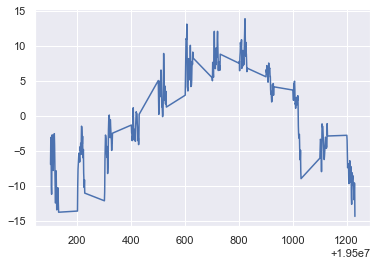

In [45]:
#amr_2000=amr_2000[['MESS_DATUM','TMK','TNK','TXK','year','month']].groupby('MESS_DATUM').mean()
mean=np.mean(amr_2000[amr_2000['year']==1950]['TMK'])
plt.plot(amr_2000[amr_2000['year']==1950]['TMK']-mean)

AMR_key: available climate history

8326 :  1969 ,  2021 ; 9479 :  1952 ,  2021 ; 5515 :  1970 ,  2021 ; 6412 :  1939 ,  2021 ; 8335 :  1972 ,  2021 ; 8336 :  1978 ,  2005 ; 13071 :  1976 ,  2021 ; 9362 :  1949 ,  2021 ; 13075 :  1959 ,  2021 ; 14612 :  1963 ,  2021 ; 8212 :  1948 ,  2021 ; 15003 :  1957 ,  2021 ; 3101 :  1937 ,  2021 ; 8222 :  1969 ,  2021 ; 3241 :  1950 ,  2021 ; 4011 :  1926 ,  2021 ; 7211 :  1959 ,  2021 ; 9262 :  1966 ,  2021 ; 14511 :  1955 ,  2021 ; 11000 :  1900 ,  2021 ; 8111 :  1950 ,  2021 ; 16051 :  1951 ,  2021 ; 16054 :  1953 ,  2021 ; 10041 :  1956 ,  2021 ; 9662 :  1972 ,  2021 ; 9663 :  1966 ,  2021 ; 5315 :  1957 ,  2021 ; 7111 :  1990 ,  2021 ; 9162 :  1939 ,  2021 ; 3403 :  1957 ,  2021 ; 3404 :  1959 ,  2010 ; 13003 :  1954 ,  2021 ; 5711 :  1969 ,  2021 ; 2000 :  1936 ,  2021 ; 5970 :  1969 ,  2021 ; 6611 :  1954 ,  2021 ; 5334 :  1937 ,  2011 ; 3159 :  1969 ,  2021 ; 8311 :  1955 ,  2021 ; 9564 :  1955 ,  2021 ; 8421 :  1969 ,  2014 ; 8436 :  1965 ,  2021 ; 9462 :  1979 ,  2021 ; 9463 :  1958 ,  2021 ; 9464 :  1948 ,  2021 ; 14713 :  1958 ,  2021 ; 5113 :  1963 ,  2021

In [31]:
#the og data has the station level data, to convert this to AMR level data, first take average of temperature 
#over all stations in every AMR.
amr_panel_temp00=weatherog.groupby(by=["AMR_key","MESS_DATUM"]).mean().drop(["STATIONS_ID","QN_3"],axis=1)
amr_panel_temp00_dims=amr_panel_temp00.groupby(by="AMR_key").count() #gives number of observations in every AMR
print(amr_panel_temp00.shape)
amr_panel_temp00.reset_index(inplace=True)

(1065632, 3)


In [32]:
print("There are ",amr_panel_temp00_dims.shape[0]," Labour Market Regions in the Temperature Data" )

There are  47  Labour Market Regions in the Temperature Data


In [33]:
amr_panel_temp00["year"]=(amr_panel_temp00["MESS_DATUM"]/10000).astype(int)
amr_panel_temp00["month"]=((amr_panel_temp00["MESS_DATUM"]%10000)/100).astype(int)
amr_panel_temp00["day_of_year"]=amr_panel_temp00.groupby(by=["AMR_key","year"]).cumcount()+1
print("The Years in the Data: ",set(amr_panel_temp00["year"]))
print("The Month in the Data: ",set(amr_panel_temp00["month"]))
print("The columns in the Data: ",list(amr_panel_temp00.columns))

The Years in the Data:  {1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}
The Month in the Data:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
The columns in the Data:  ['AMR_key', 'MESS_DATUM', 'TMK', 'TXK', 'TNK', 'year', 'month', 'day_of_year']


PLOTTING THE MEAN ANNUAL TEMPERATURE FROM 1900 TO 2021
                    (demeaned) 


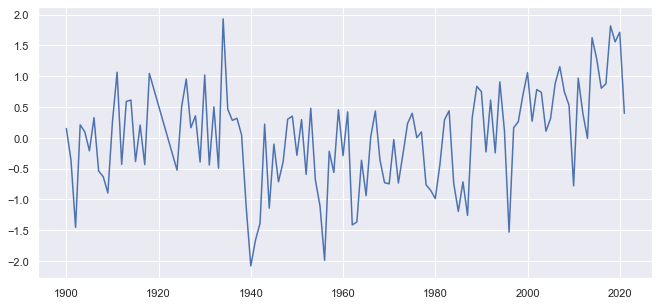

In [34]:
print("PLOTTING THE MEAN ANNUAL TEMPERATURE FROM 1900 TO 2021")
print("                    (demeaned) ")
df=amr_panel_temp00.groupby(by=["year"]).mean().reset_index()
df['demeaned']=df['TMK']-np.mean(df['TMK'])
years=[1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1924, 1925, 1926, 1927, 1928, 
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 
       1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

fig,ax=plt.subplots(figsize=(11,5))
ax.plot(years,df['demeaned'])
plt.show()

 PLOTTING THE MEAN TEMPERATURE IN EVERY MONTH YEAR FROM 1900 TO 2021
                                                          (demeaned) 


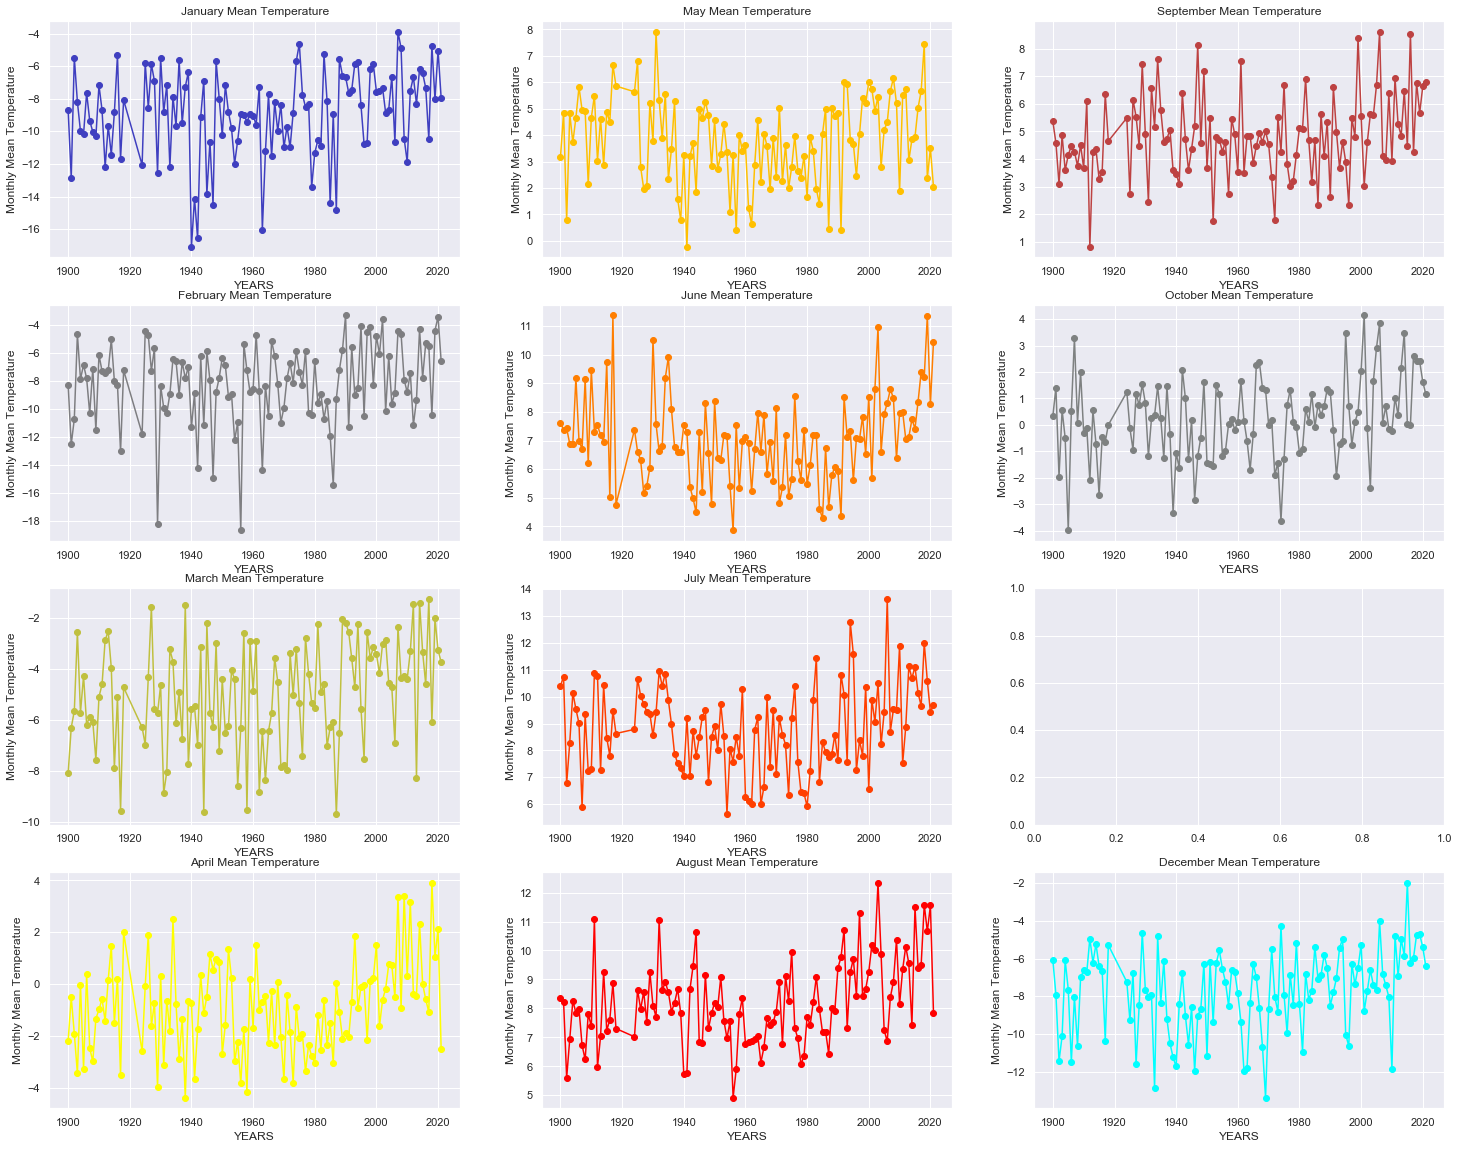

In [35]:
print(" PLOTTING THE MEAN TEMPERATURE IN EVERY MONTH YEAR FROM 1900 TO 2021")
print("                                                          (demeaned) ")
df=amr_panel_temp00.groupby(by=["year","month"]).mean().reset_index()
df['year_mean']=amr_panel_temp00.groupby(by='year').transform('mean')['TMK']
years=[1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1924, 1925, 1926, 1927, 1928, 
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 
       1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
cmap=sns.blend_palette(colors=["blue","yellow","red","cyan"],n_colors=13)
fig,ax=plt.subplots(4,3,figsize=(25,20))
sns.set_theme(style="darkgrid")
mon=1
for i in range(3):
    for j in range(4):
        try:
            tdf=pd.DataFrame(df[df["month"]==mon][["TMK","year_mean"]])
            tdf['demeaned']=tdf['TMK']-tdf['year_mean']
            ax[j][i].plot(years,tdf['demeaned'],marker="o",color=cmap[mon])
            ax[j][i].set_xlabel("YEARS")
            ax[j][i].set_ylabel("Monthly Mean Temperature")
            ax[j][i].set_title(mon_dict[mon]+" Mean Temperature")
        except:
            no=0
        mon=mon+1
plt.grid(True)
plt.show()

##  DAILY WIND SPEED DATA FROM 1900

In [61]:
weatherog=pd.read_csv("winddfv1900.csv").drop("Unnamed: 0",axis=1)
weatherog.shape

(3778592, 7)

In [62]:
amr_panel_wind00=weatherog.groupby(by=["AMR_key","MESS_DATUM"]).mean().drop(["STATIONS_ID","QN_3"],axis=1)
amr_panel_wind00_dims=amr_panel_temp00.groupby(by="AMR_key").count() #gives number of observations in every AMR
print(amr_panel_wind00.shape)
amr_panel_wind00.reset_index(inplace=True)

(992748, 2)


In [63]:
print("There are ",amr_panel_wind00_dims.shape[0]," Labour Market Regions in the Wind Speed Data" )

There are  47  Labour Market Regions in the Wind Speed Data


In [65]:
amr_panel_wind00["year"]=(amr_panel_wind00["MESS_DATUM"]/10000).astype(int)
amr_panel_wind00["month"]=((amr_panel_wind00["MESS_DATUM"]%10000)/100).astype(int)
amr_panel_wind00["day_of_year"]=amr_panel_wind00.groupby(by=["AMR_key","year"]).cumcount()+1
print("The Years in the Data: ",set(amr_panel_wind00["year"]))
print("The Month in the Data: ",set(amr_panel_wind00["month"]))
print("The columns in the Data: ",list(amr_panel_wind00.columns))

The Years in the Data:  {1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}
The Month in the Data:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
The columns in the Data:  ['AMR_key', 'MESS_DATUM', 'FX', 'FM', 'year', 'month', 'day_of_year']


 PLOTTING THE MEAN WIND SPEED IN EVERY MONTH YEAR FROM 1900 TO 2021
                         (demeaned) 


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


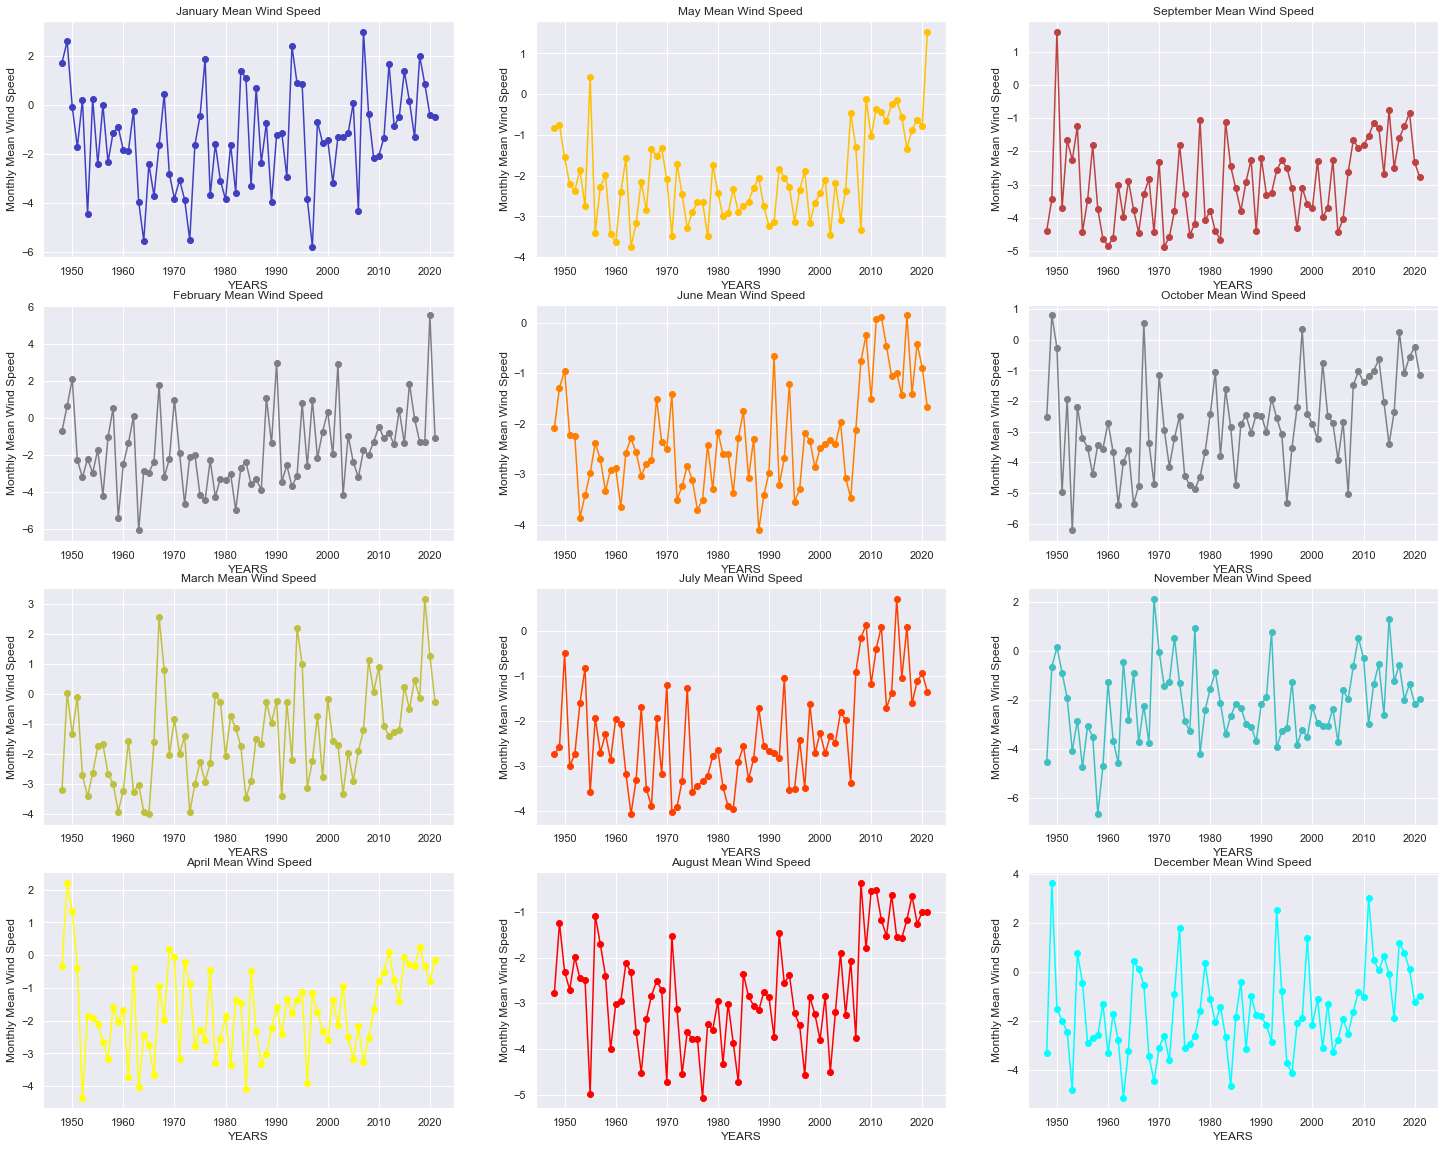

In [86]:
print(" PLOTTING THE MEAN WIND SPEED IN EVERY MONTH YEAR FROM 1900 TO 2021")
print("                         (demeaned) ")
df=amr_panel_wind00.groupby(by=["year","month"]).mean().reset_index()
df['year_mean']=amr_panel_wind00.groupby(by='year').transform('mean')['FX']
cmap=sns.blend_palette(colors=["blue","yellow","red","cyan"],n_colors=13)
fig,ax=plt.subplots(4,3,figsize=(25,20))
sns.set_theme(style="darkgrid")
mon=1
for i in range(3):
    for j in range(4):
        try:
            tdf=pd.DataFrame(df[df["month"]==mon][["FX","year_mean",'year','month']])
            tdf['demeaned']=tdf['FX']-tdf['year_mean']
            ax[j][i].plot(tdf['year'],tdf['demeaned'],marker="o",color=cmap[mon])
            ax[j][i].set_xlabel("YEARS")
            ax[j][i].set_ylabel("Monthly Mean Wind Speed")
            ax[j][i].set_title(mon_dict[mon]+" Mean Wind Speed")
        except:
            no=0
        mon=mon+1
plt.grid(True)
plt.show()

## DAILY PRECIPITATION DATA

In [87]:
weatherog=pd.read_csv("precdfv1900.csv").drop("Unnamed: 0",axis=1)
weatherog.shape

(3292236, 7)

In [88]:
amr_panel_prec00=weatherog.groupby(by=["AMR_key","MESS_DATUM"]).mean().drop(["STATIONS_ID","QN_3"],axis=1)
amr_panel_prec00_dims=amr_panel_prec00.groupby(by="AMR_key").count() #gives number of observations in every AMR
print(amr_panel_prec00.shape)
amr_panel_prec00.reset_index(inplace=True)

(1070477, 2)


In [90]:
print("There are ",amr_panel_prec00_dims.shape[0]," Labour Market Regions in the Precipitation Data" )

There are  47  Labour Market Regions in the Precipitation Data


In [91]:
amr_panel_prec00["year"]=(amr_panel_prec00["MESS_DATUM"]/10000).astype(int)
amr_panel_prec00["month"]=((amr_panel_prec00["MESS_DATUM"]%10000)/100).astype(int)
amr_panel_prec00["day_of_year"]=amr_panel_prec00.groupby(by=["AMR_key","year"]).cumcount()+1
print("The Years in the Data: ",set(amr_panel_prec00["year"]))
print("The Month in the Data: ",set(amr_panel_prec00["month"]))
print("The columns in the Data: ",list(amr_panel_prec00.columns))

The Years in the Data:  {1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}
The Month in the Data:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
The columns in the Data:  ['AMR_key', 'MESS_DATUM', 'RSK', 'RSKF', 'year', 'month', 'day_of_year']


 PLOTTING THE MEAN PRECIPITATION IN EVERY MONTH YEAR FROM 1900 TO 2021
                         (demeaned) 


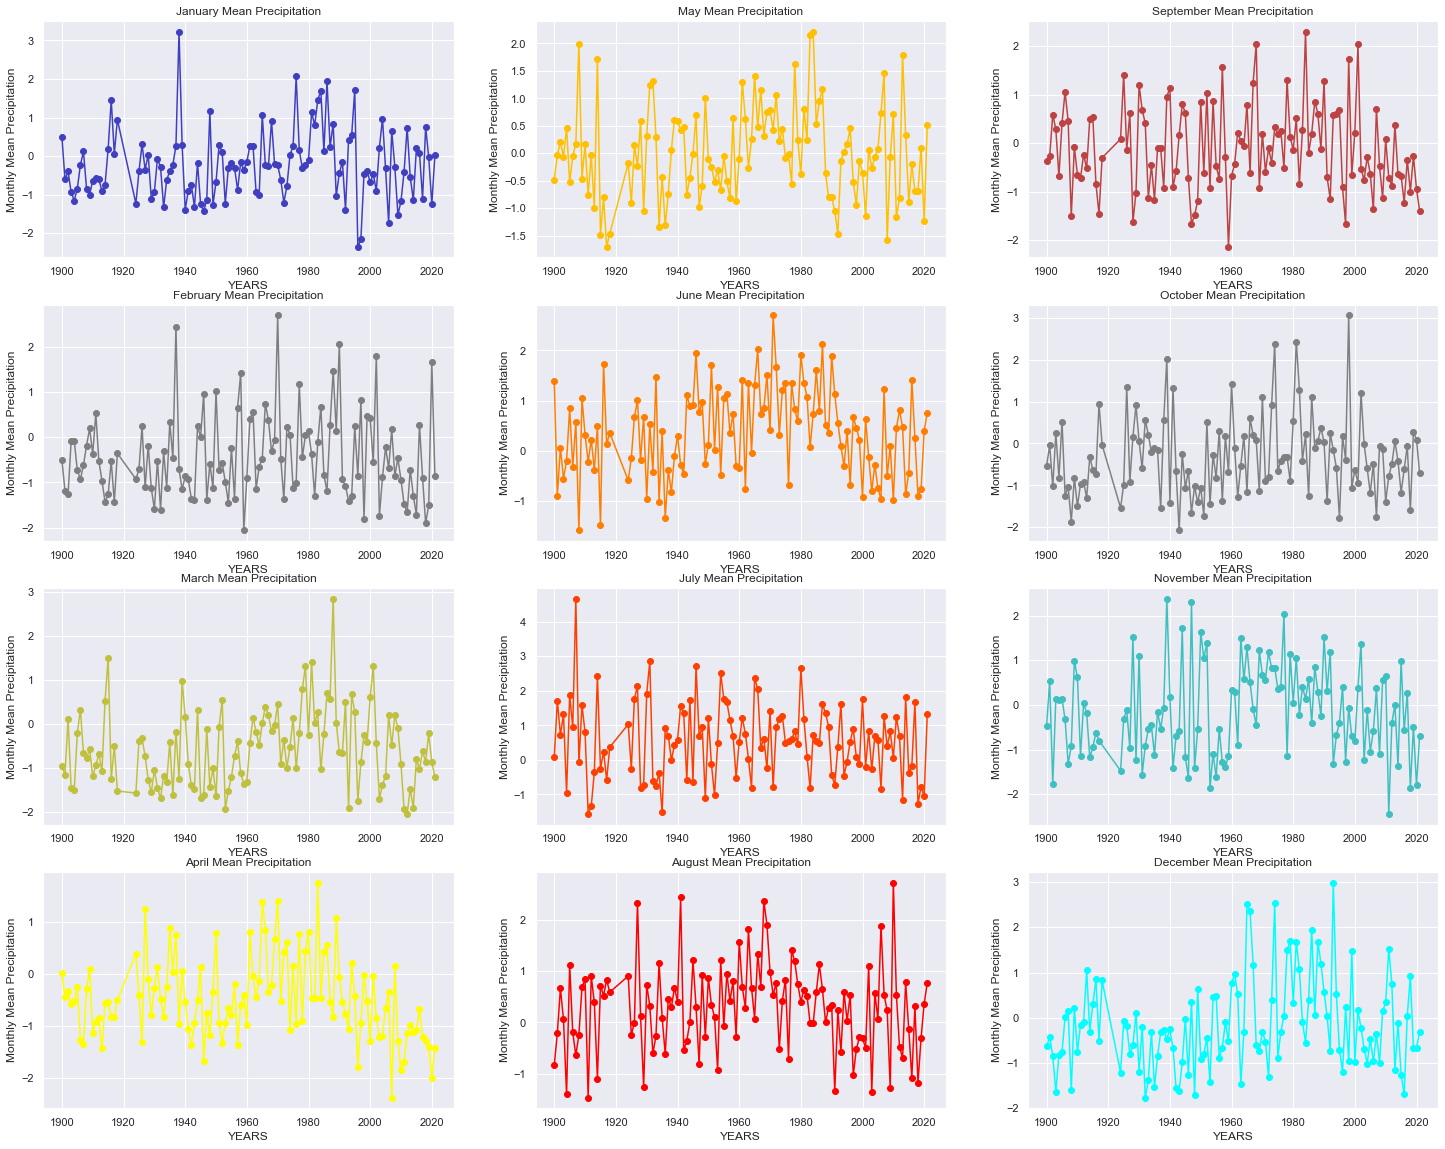

In [92]:
print(" PLOTTING THE MEAN PRECIPITATION IN EVERY MONTH YEAR FROM 1900 TO 2021")
print("                         (demeaned) ")
df=amr_panel_prec00.groupby(by=["year","month"]).mean().reset_index()
df['year_mean']=amr_panel_prec00.groupby(by='year').transform('mean')['RSK']
cmap=sns.blend_palette(colors=["blue","yellow","red","cyan"],n_colors=13)
fig,ax=plt.subplots(4,3,figsize=(25,20))
sns.set_theme(style="darkgrid")
mon=1
for i in range(3):
    for j in range(4):
        try:
            tdf=pd.DataFrame(df[df["month"]==mon][["RSK","year_mean",'year','month']])
            tdf['demeaned']=tdf['RSK']-tdf['year_mean']
            ax[j][i].plot(tdf['year'],tdf['demeaned'],marker="o",color=cmap[mon])
            ax[j][i].set_xlabel("YEARS")
            ax[j][i].set_ylabel("Monthly Mean Precipitation")
            ax[j][i].set_title(mon_dict[mon]+" Mean Precipitation")
        except:
            no=0
        mon=mon+1
plt.grid(True)
plt.show()